***
<font size=+2>ID: **AI-0009**</font><br>
<font size=+2>Submission Date: **16-01-2018**</font>
***

## Abstract:
<font size=+0.5>**"Dog Breed Identification"**</font><br>
The Dataset is strictly canine subset of ImageNet in order to practice fine-grained Image Categorization. Transfer Learning plays an important role in the field of Image Classification. This Project was established based on Transfer Learning with Pretrained Model. The idea was to Pipeline the Pretrained Model with Custom Layers at the end. From 120 Breeds of Dogs, Images were Preprocessed and the Model was trained with the Base Model Layers freezed. Many Pretrained Models like VGG16, VGG19, Xception etc were attempted and the Final Version was presented.

## Purpose of the Assignment:
The purpose of the Assignment is to dig into Computer Vision including Convolution Neural Network(CNN), Transfer Learning and exploring the Classification Methods. The Goal in this Assignment is to Determine the Breed of a Dog in an Image.
***

In [3]:
%%javascript
IPython.Cell.options_default.cm_config.lineNumbers = false;
IPython.OutputArea.prototype._should_scroll = function(lines) 
{
    return false;
} 
// This code snippet is used to turn off auto scrolling in outputs
// Ignore this snippet as it is not a part of the project

<IPython.core.display.Javascript object>

## 1. Data Set Overview


Total Data in Train Set: 10222
Total Data in Test Set: 10357
Total Classes(Breeds of Dogs): 120

Label Samples:
                                  id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound
---------------------------------------------------------------
Sample Image(Siberian Husky):


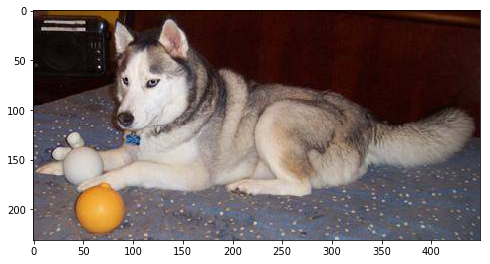

---------------------------------------------------------------

Allocation of Dog Breed in the Train Set:
                                 Counts
scottish_deerhound                 126
maltese_dog                        117
afghan_hound                       116
entlebucher                        115
bernese_mountain_dog               114
shih-tzu                           112
great_pyrenees                     111
pomeranian                         111
basenji                            110
samoyed                            109
tibetan_terrier                    107
airedale                           107
cairn                              106
leonberg                           106
beagle                             105
japanese_spaniel                   105
blenheim_spaniel                   102
miniature_pinscher                 102
australian_terrier                 102
irish_wolfhound                    101
saluki                              99
lakeland_terrier                  

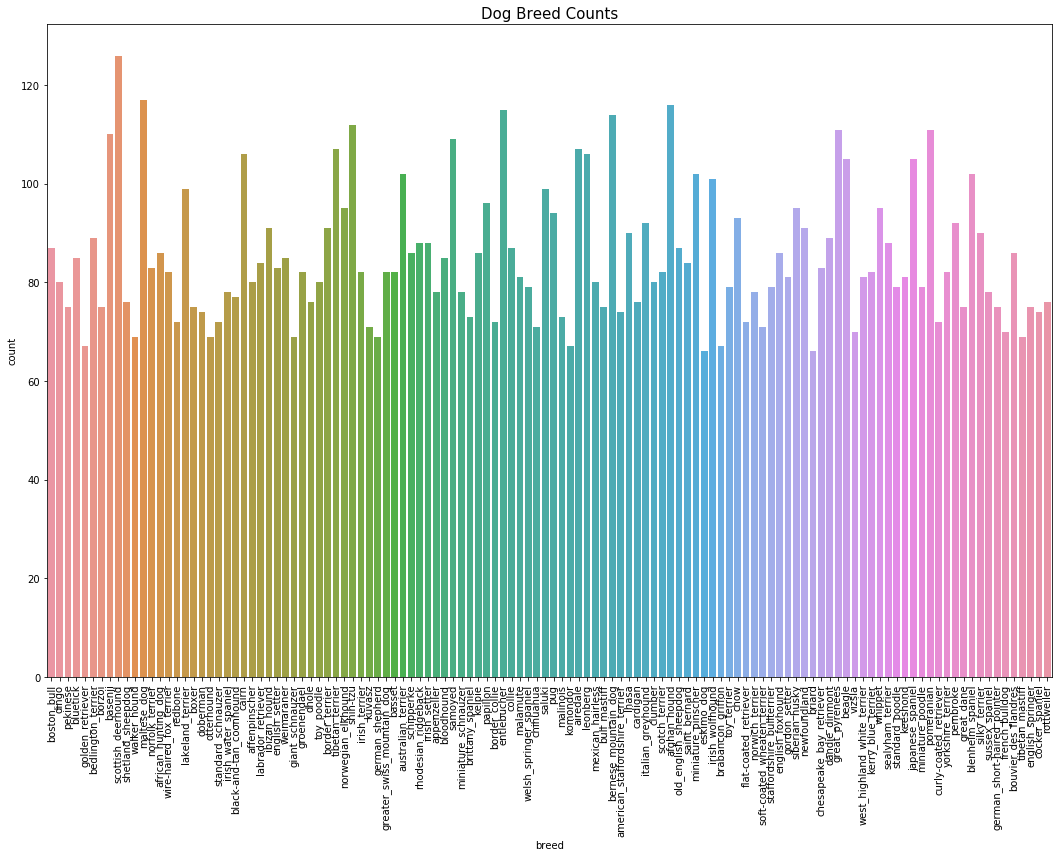

In [2]:
# Dog Breed Identification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Img
import seaborn as sb
import os
import cv2

from tqdm import tqdm

np.random.seed(10)

# Data Import(id and breed)
DBtrnY = pd.read_csv('/mydata/labels.csv')             # Train id and breed
DBtstY = pd.read_csv('/mydata/sample_submission.csv')  # Test id and breed

# Data Size
print('\nTotal Data in Train Set:', len(DBtrnY))
print('Total Data in Test Set:', len(DBtstY))
NC = DBtrnY['breed'].value_counts().size  # Number of Classes
print('Total Classes(Breeds of Dogs):', NC)

# Sample
print('\nLabel Samples:\n', DBtrnY.head(10))
print('---------------------------------------------------------------')
print('Sample Image(Siberian Husky):')
Id = '0c9fc0f58a6724ca680c76785a452bba.jpg'
Locator = os.path.join('/mydata/train', Id)
Sample = Img.open(Locator)
plt.figure(2, figsize=(8,5))
plt.imshow(Sample)
plt.grid(b = False)
plt.show()
print('---------------------------------------------------------------')


# Allocation
Allocation = DBtrnY['breed'].value_counts().to_frame(name = 'Counts')
print('\nAllocation of Dog Breed in the Train Set:\n', Allocation)

# Bar Plot of Label Counts
plt.figure(1, figsize=(18,12))
plt.title('Dog Breed Counts', fontsize=15)
plt.xticks(rotation = 90)
sb.countplot(DBtrnY['breed'])
plt.show()

<h2>Cell Report:</h2><br>
**1.** Allocation of Dog Breeds in the Train Set was represented.<br>
**2.** Label Counts(Train Set) were Visually represented.

## 2. Data Preprocessing

In [3]:
# Image Size(Tunable)
ImSize = 250

# One Hot Encoding of Labels
LabelSeries = pd.Series(DBtrnY['breed'])
OHE = pd.get_dummies(LabelSeries, sparse = True)
DBtrnOHE = np.asarray(OHE)

# Data Import and Resize(Train and Test Images)
DBtrnX = []   # Train Images
DBtstX = []   # Test Images
DBtrnRY = []  # Train Image Labels

# Train
i = 0 
for ImageId, breed in tqdm(DBtrnY.values):
    Image = cv2.imread('/mydata/train/{}.jpg'.format(ImageId))
    Label = DBtrnOHE[i]
    DBtrnX.append(cv2.resize(Image, (ImSize, ImSize)))
    DBtrnRY.append(Label)
    i = i + 1

print('------------------------------------------------------')
    
# Test
for ImageId in tqdm(DBtstY['id'].values):
    Image = cv2.imread('/mydata/test/{}.jpg'.format(ImageId))
    DBtstX.append(cv2.resize(Image, (ImSize, ImSize)))

# Data Normalization(Min-Max)
DBtrnRY = np.array(DBtrnRY, np.uint8)
DBtrnRX = np.array(DBtrnX, np.float32) / 255.0
DBtstRX = np.array(DBtstX, np.float32) / 255.0

# Data Shape
print('\nShape of Train Data:', DBtrnRX.shape)
print('Shape of Train Labels:', DBtrnRY.shape)
print('Shape of Test Data:', DBtstRX.shape)

  0%|          | 50/10357 [00:00<00:20, 492.12it/s]

------------------------------------------------------


100%|██████████| 10357/10357 [00:23<00:00, 448.06it/s]



Shape of Train Data: (10222, 250, 250, 3)
Shape of Train Labels: (10222, 120)
Shape of Test Data: (10357, 250, 250, 3)


<h2>Cell Report:</h2><br>
**1.** Labels were One Hot Encoded as required by Keras and also the Scoring will be in Multiclass Loss.<br>
**2.** Train and Test Images were imported sequentially and resized.<br>
**3.** Data were Normalized(Min-Max).<br>
**4.** Data Shapes were represented.<br>
**5.** Image Size: 250 X 250

## 3. Decision of Algorithm and Model(Keras: Transfer Learning)

In [ ]:
# Keras(Transfer Learning)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras

from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.models import Model
from keras.applications.xception import Xception

# Base Pre Trained Model
BaseModel = Xception(weights = 'imagenet', 
                     include_top = False, 
                     input_shape = (ImSize, ImSize, 3))

# New Top Layer
x = BaseModel.output
x = Flatten()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.25)(x)

# Prediction Layer(Last Dense Layer)
PredLayer = Dense(NC, activation = 'softmax')(x)  # NC = Number of Classes

# Model Pipelining
model = Model(inputs = BaseModel.input, outputs = PredLayer)

# Train only the Top Layers(Weights Randomly Initialized)
for layer in BaseModel.layers:
    layer.trainable = False

<h2>Cell Report:</h2><br>
**1.** Transfer Learning was utilized for the Model. The Model Summary is given below.<br>
**2.** Various Pre Trained Model from Keras was used and the best was found to be Xception.<br>
**3.** Weights were taken from 'imagenet' and used in the BaseModel.<br>
**4.** Output of the BaseModel was Flattened and Pipelined through 2 Dense Layers with Dropout to the Prediction Layer.<br>
**5.** For the Layers in the BaseModel, Weight Updating was turned off.<br>
**6.** Only the last few Layers were kept as Trainable.

## Model Architecture: Demonstration using VGG19

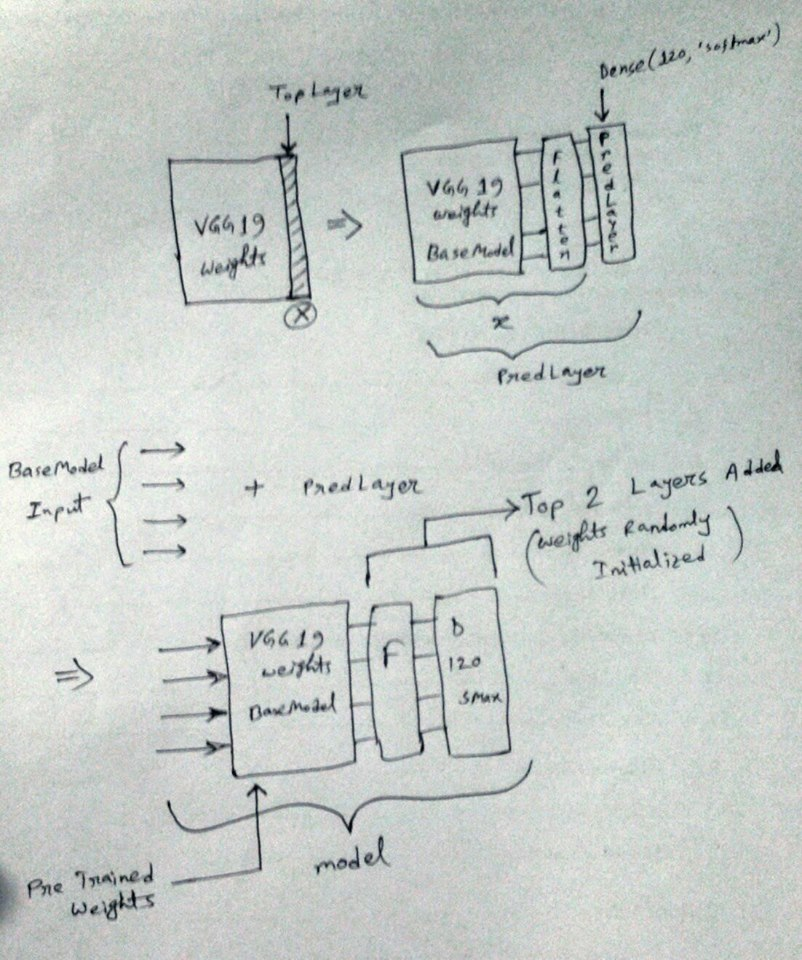

In [1]:
from IPython.display import Image
Image('Model.jpg')

## 4. Decision of Hyper Parameters:
<font size=+1.5>(Epochs, Activation Function, Optimizer, Learning Rate and Number of Neurons)</font>

In [6]:
# Hyper Parameter Tuning
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau

# Epochs
epochs = 30

# Activation Function
# The Activation Fun in the Prediction Layer is 'softmax' as it should be

# Optimizer
optimizer = SGD(lr = 0.0001, momentum = 0.9)

# Learning Rate
LRA = ReduceLROnPlateau(monitor = 'val_loss',  # Learning Rate Annealer   
                        patience = 5, 
                        verbose = 1, 
                        factor = 0.5, 
                        min_lr = 0.00001)

# Number of Neurons
# 2 Dense Layers(1024, 1024)
# Number of Neurons in the Prediction Layer is 120(Number of Classes)

<h2>Cell Report:</h2><br>
**1.** Hyper Parameters were tuned.<br>
**2.** SGD was used as Optimizer as it works well in this Architecture.<br>
**3.** In order to make the Optimizer converge faster and closest to the Global Minimum of the Loss Function, an Annealing Method of the Learning Rate(LR) was used because it's better to have a decreasing Learning Rate during the Training to reach efficiently the Global Minimum of the Loss Function.<br>
**4.** With the ReduceLROnPlateau function from Keras.callbacks, it was chosen to reduce the LR by half if the Accuracy is not improved after 5 epochs.<br>
**5.** More epochs could have improved the Final Score but due to limitations of Available Computational Power, it was not affordable.<br>
**6.** Activation Function in the Last Layer: 'softmax'.

## 5. Best Designed Model(Tuned Hyper Parameters)

In [7]:
# Model(Final)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = optimizer, 
              metrics = ['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2)]
print('\nModel Summary:\n')
model.summary()

# Training of Model
model.fit(DBtrnRX, DBtrnRY, epochs = epochs, validation_split = 0.2, verbose = 2, callbacks = [LRA])

# Predictions
PredDB = model.predict(DBtstRX, verbose = 1)

# DataFrame
PredDB = pd.DataFrame(PredDB)

# Column Names
ColNames = OHE.columns.values
PredDB.columns = ColNames

# Column Id
PredDB.insert(0, 'id', DBtstY['id'])

# CSV File(Kaggle Format)
PredDB.to_csv('PredDB(MFinal).csv', index=False)


Model Summary:

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 250, 250, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 124, 124, 32)  864         input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv1_bn (BatchNormalizat (None, 124, 124, 32)  128         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_conv1_act (Activation)    (None, 124, 124, 32)  0           block1_conv1_bn[0][0]            
__________________________________________________________________________

Train on 8177 samples, validate on 2045 samples
Epoch 1/30
239s - loss: 4.5525 - acc: 0.0724 - val_loss: 3.8165 - val_acc: 0.3438
Epoch 2/30
203s - loss: 3.5881 - acc: 0.3131 - val_loss: 2.8401 - val_acc: 0.4949
Epoch 3/30
203s - loss: 2.6615 - acc: 0.4652 - val_loss: 2.1326 - val_acc: 0.5888
Epoch 4/30
203s - loss: 2.0769 - acc: 0.5485 - val_loss: 1.7519 - val_acc: 0.6274
Epoch 5/30
203s - loss: 1.6865 - acc: 0.6238 - val_loss: 1.5496 - val_acc: 0.6430
Epoch 6/30
203s - loss: 1.4487 - acc: 0.6687 - val_loss: 1.4233 - val_acc: 0.6533
Epoch 7/30
203s - loss: 1.2783 - acc: 0.6949 - val_loss: 1.3530 - val_acc: 0.6582
Epoch 8/30
203s - loss: 1.1372 - acc: 0.7300 - val_loss: 1.2915 - val_acc: 0.6733
Epoch 9/30
203s - loss: 1.0238 - acc: 0.7552 - val_loss: 1.2585 - val_acc: 0.6748
Epoch 10/30
203s - loss: 0.9284 - acc: 0.7769 - val_loss: 1.2226 - val_acc: 0.6748
Epoch 11/30
203s - loss: 0.8495 - acc: 0.7939 - val_loss: 1.1961 - val_acc: 0.6875
Epoch 12/30
203s - loss: 0.7705 - acc: 0.8153 - 

<h2>Cell Report:</h2><br>
**1.** Best Designed Model with Tuned Hyper Parameters was represented.<br>
**2.** Tuned Hyper Parameters had been used in Keras with TensorFlow backend.<br>
**3.** Kaggle Score: 1.15296(Multiclass Loss)

## 6. Results
**1.** Final Kaggle Score(Best Designed Model): 1.15296<br>
**2.** The Submission File(Predicted Outputs) has been attached.<br> 
**3.** A Sample Output has been shown below.

### 6.1 Sample Output

In [8]:
# Sample Output
PredDB = pd.read_csv('PredDB(MFinal).csv')
print('\nSample Output(5 Predictions):\n')
print(PredDB.head(5))


Sample Output(5 Predictions):

                                 id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   7.483006e-09  7.903216e-07   
1  00102ee9d8eb90812350685311fe5890   1.977060e-03  2.794395e-03   
2  0012a730dfa437f5f3613fb75efcd4ce   5.310068e-07  2.716771e-02   
3  001510bc8570bbeee98c8d80c8a95ec1   3.281138e-03  1.204931e-03   
4  001a5f3114548acdefa3d4da05474c2e   1.632390e-04  1.812646e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.417392e-08  1.502395e-10                    1.396897e-10   
1         5.627718e-03  2.867685e-03                    8.674776e-03   
2         1.869580e-05  4.925131e-04                    1.723655e-06   
3         2.955537e-04  2.532675e-05                    1.488772e-03   
4         1.975929e-05  3.615208e-07                    3.660051e-06   

    appenzeller  australian_terrier       basenji        basset  \
0  4.673874e-10        3.219590e-10  6.832094e-09  9.754595

### 6.2 Kaggle Score(Screen Shot)

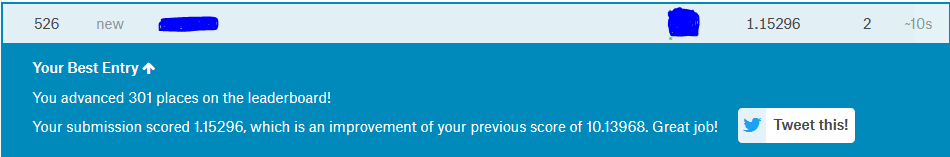

In [2]:
# Kaggle Score(Screen Shot)
from IPython.display import Image
Image('Kaggle.PNG')

<font size=+1.8>**Note: The main problem during the Project was a Good Personal Computer with powerful GPU(Nvidia) and sufficient RAM. My Laptop does not have Nvidia GPU and enough RAM to run this Project. So, I had to rely on Cloud Service(Floydhub.com) where I created multiple accounts to take 2 hours of free GPU service on each account. 2 hours time limit is never enough for this kind of Image Classification based Projects. So, I had to limit my Number of epochs and other important Parameters such as Number of Base Model Layers to keep as Trainable. It is also to be mentioned that it takes so much time to upload large Datsets of Image Classification and other Dependencies on Floydhub. Also each account creation on Floydhub.com requires time which is exhaustive. With such time consuming miscellaneous activities and with such Resource Constraints, it is impossible to achieve good scores on Kaggle. So, the evaluation should be based on the Approach rather than Scores. Only if I could run the project without this limitations, Kaggle Score would have been appreciable.**</font>

## 7. Discussion
**1.** More epochs could have improved the Final Score but it was not affordable due to lack of sufficient Computational Power.<br>
**2.** Pre Trained Models are Generalized. For specific Applications, Fine Tuning can improve Accuracy.<br>
**3.** Learning Rate Annealing method helped improving the Final Score.<br>
**4.** Some Images are hard to distinguish from noisy Backgrounds. It's the reason for errorneous Training of the Model.

## 8. Conclusions

**Transfer Learning:** Ensembling Pre Trained Models can improve the Final Score. However, Pipelining the Prediction Layer and initializing with 'imagenet' Weights have been the basic of this Project.